<a href="https://colab.research.google.com/github/markbriers/data-science-jupyter/blob/main/week6_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling part 1 (Week 6)

Code at: https://github.com/markbriers/data-science-jupyter

## Recap - the story so far

Our goal is to follow a data science process (CRISP-DM) to deliver a successful business outcome.

Our learning objectives are as follows:

* Describe the six stages of a data processing pipeline (using CRISP-DM)

* Demonstrate an understanding of the python programming language through the production of elementary data analysis programme

* Analyse at least three different data sources by applying at least one python data processing library to extract and explore pertinent features

* Be able to design a set of data requirements for a specified business problem

* Describe and apply (using the python programming language) the main approaches to supervised learning for a given classification problem

* Understand the use cases of Big Data technology (in particular Spark)

* Produce a report including appropriate data visualisations covering the analysis of a business problem using a data science based approach

## Learning outcome

* By the end of the lecture, you will be able to differentiate a multivariable function and functional compositions from first principles. This will allow you to select the parameters of a simple linear model.

* By the end of the lecture, you will be able to determine the parameters of a linear regression model using least squares estimation. This will allow you to predict the outcome of an event with unseen data.

***

## Functions and derivatives

A function is a relation between sets that associates to every element of a first set exactly one element of the second set
* Examples:
\begin{eqnarray}
f_1(x) & = & x^3 \\
f_2(x) & = & x+2 \\
f_3(x) & = & 2x \\
f_4(x) & = & \frac{1}{\sqrt{2\pi}}\exp{\left(-\frac{x^2}{2}\right)} \\
f_5(x,y) & = & x^{2}2y^{3}
\end{eqnarray}

We often wish to characterise how "steep" a function is at a particular point. The functions listed above (and all other _differentiable_ functions) have a _slope_ at a particlar point in the function. We can compute the extent of this slope as follows:

\begin{equation}
\mbox{slope} = \frac{\Delta_y}{\Delta_x} = \frac{\mbox{change in y}}{\mbox{change in x}}
\end{equation}
![Slope](https://drive.google.com/uc?id=1bze2QvihebSI_7Ls9TBwWAVucu4-bDF_)

For example, lets calculate the average slope between two points:

<img src="https://drive.google.com/uc?id=1q0FImsRZtKPpnWOY4H-0cEC8RXIGq0Vn" alt="vector-scalar" style="width: 550px;height: 500px"/>

### Introducting the derivative

* The _derivative_ of a function allows us to compute the slope at a particular point in the input space
* Calculating a derivate is the same as calculating a slope, but we use a _smarter_ mathematical technique that allows us to compute the slope at any point in the function
* We use $h$ to represent the infinitesimal distance (i.e. a very small number)
<p>&nbsp;</p>
* Example:
\begin{equation}
f(\theta_{1}) = \theta_1^2
\end{equation}

We can use differentiation to compute derivatives of functions:

1. Increment $\theta_{1}$ by a very small value, $h$, such that $f(\theta_1 +h) = (\theta_1+h)^2$
2. Apply the slope formula:
\begin{equation}
\frac{f(\theta_1 +h)-f(\theta_1)}{h}
\end{equation}
3. Simplify the equation:
\begin{equation}
\frac{\theta_1^2+2\theta_1 h+h^2-\theta_1^2}{h} = \frac{2\theta_1 h+h^2}{h} = 2\theta_1+h
\end{equation}
4. Set $h$ to 0 (the limit as $h\rightarrow 0$)
\begin{equation}
2\theta_1+0 = 2\theta_1
\end{equation}
<p>&nbsp;</p>
This means that the slope at an any point of $f(\theta_1)$, its derivative, is $2\theta_1$

<img src="https://drive.google.com/uc?id=1G_9l5awtaypv7c1HBXfZfBZLzeeWFGmT" alt="vector-scalar" style="width: 400px;height: 400px"/>

What do we do if a function has more than one variable?

In functions with 2 or more variables (e.g. functions of vectors), the partial derivative is the derivative of one variable with respect to the others. Let's look at an example:

1. Given a multivariable function, $f(x,z) = 2z^3 x^2$ calculate the derivative $\frac{df}{dx}(x,z)$
2. Swap $2z^3$ with a constant $b$:
\begin{equation}
f(x,z) = bx^2
\end{equation}
3. Calculate the derivative with $b$ constant:
\begin{eqnarray}
\lim_{h\rightarrow 0} \frac{b(x+h)^2-bx^2}{h}\\
\lim_{h\rightarrow 0} \frac{b((x+h)(x+h))-bx^2}{h} \\
\lim_{h\rightarrow 0} \frac{bx^2+2bxh+bh^2-bx^2}{h} \\
\lim_{h\rightarrow 0} 2bx+bh
\end{eqnarray}
4. Swap $b=2z^3$ back into this equation: $4z^3x$
5. Repeat steps to calculate derivative w.r.t. $z$, $\frac{df}{dz}(x,z) = 6x^2 z^2$

We can store the partial derivates in a gradient:
\begin{equation}
\Delta f(x,z) = \left[\begin{matrix} 
   \frac{df}{dx} \\
   \frac{df}{dz}\\
   \end{matrix}\right] = \left[\begin{matrix} 
   4z^3x \\
   6x^2 z^2\\
   \end{matrix}\right]
\end{equation}

### Introducing a gradient

* A gradient is a vector that stores the partial derivatives of multivariable functions
* It helps us calculate the slope at a specific point on a curve for functions with multiple independent variables
* In order to calculate this more complex slope, we need to isolate each variable to determine how it impacts the output on its own
* To do this we iterate through each of the variables and calculate the derivative of the function after holding all other variables constant
* Each iteration produces a partial derivative which we store in the gradient

* A gradient always points in the direction of the greatest increase of a function
* A gradient is always zero at a local minimum or maximum

Let's compute the gradient of the function $f(\theta_{1},\theta_{2}) = \theta_{1}^2 + \theta_{2}^2$ as follows. (The function looks like this: https://www.google.com/search?q=x%5E2+%2B+y%5E2&oq=x%5E2+&aqs=chrome.0.69i59j69i57.1620j0j1&sourceid=chrome&ie=UTF-8)

<img src="https://drive.google.com/uc?id=1h13yiaQ9HFEgxigs8ABkHUfS45ZQjCsl" alt="vector-scalar" style="width: 550px;height: 500px"/>

In this module, we will only superficially cover differentiation (in the interests of time). However, if you are interested in learning more (which may be useful for your wider careers in science) then this resource: https://www.khanacademy.org/math/differential-calculus/dc-diff-intro provides an excellent in-depth overview.

## Introduction a linear modelling technique

We will now move onto modeling, exploring simple and complex statistical models (https://en.wikipedia.org/wiki/Statistical_model). Note that we will only be able to cover a small portion of the set of available models. Research into modeling and inference is constantly evolving - in this course, we will focus on linear models, logistic regression, and (for your wider knowledge) Deep Neural Networks.

Modeling is used to represent the data generating process. That is, a model can be considered an abstraction of the data, allowing one to derive population based quantities from sample based quantities. The modeling process combines statistical assumptions (contextually related to the real-world or otherwise), a mathematical expression, and data. From the data, we can fit the mathematical model, and in doing so, encode the statistical assumptions.

### Linear model

We will first consider a linear model. This can be thought of as fitting a Normal (or Gaussian) distribution to data, or equivalently fitting a straight line (or plane) to the datapoints. A straight line (in 2 dimensions) is mathematically described as follows:
\begin{equation}
y = ax + b
\end{equation}
where $a$ is the gradient and $b$ is the $y$-axis intercept (see http://www.mathcentre.ac.uk/resources/uploaded/mc-ty-strtlines-2009-1.pdf for instance).

<img src="https://drive.google.com/uc?id=1YekcxuT71dPgRZpS3zjpvNqBoLeazaC9" style="width: 800px;height: 400px"/>

<img src="https://drive.google.com/uc?id=1krQ1nfA49U8kp47A022WnKs17RWK-H6K" alt="vector-scalar" style="width: 900px;height: 600px"/>

<img src="https://drive.google.com/uc?id=1W8RHA7_X_qED6IA0lNThbxId4c3nb8ek" alt="vector-scalar" style="width: 900px;height: 600px"/>

<img src="https://drive.google.com/uc?id=11YGuosAuJjaztVh71wIQFFFo5qk8D2Kx" alt="vector-scalar" style="width: 900px;height: 600px"/>

<img src="https://drive.google.com/uc?id=1tse4evZ-BkdD928ZdKD47oZOmbynyXAg" alt="vector-scalar" style="width: 900px;height: 1100px"/>

<img src="https://drive.google.com/uc?id=1ACeG2ZvFUYUqKnq8e5pvJ5nDYQ4Ao6Kc" alt="vector-scalar" style="width: 900px;height: 600px"/>

We will now construct a linear model and estimate the paramters using Tensorflow. This code has been adapted from https://sanjayasubedi.com.np/deeplearning/tensorflow-2-linear-regression-from-scratch/

In [3]:
import tensorflow as tf

First of all, we define a linear model $y=wx+b$ as a python 'class':

In [4]:
class LinearModel:
    def __init__(self):
        self.w = tf.Variable(16.0) # Default value of W = 16.0
        self.b = tf.Variable(10.0) # Default value of b = 10.0

    def __call__(self, x):
        return self.w * x + self.b # Linear model y = wx + b

We will now simulate some data, setting true values of w and b (which we will subsequently try to estimate):

In [5]:
TRUE_W = 3.0 # slope
TRUE_b = 0.5 # intercept

NUM_EXAMPLES = 1000

X = tf.random.normal(shape=(NUM_EXAMPLES,))
noise = tf.random.normal(shape=(NUM_EXAMPLES,))
y = X * TRUE_W + TRUE_b + noise

Let's plot what the initial model looks like, with the default values specified:

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

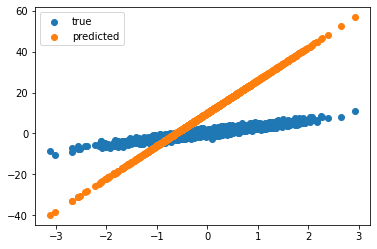

In [8]:
model = LinearModel()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()

Now we will define the energy (or *loss*) function, using least squares expression (defined above):

In [9]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

Finally, we define the training function which uses tensorflow's ability to automatically differentiate the loss function:

In [10]:
def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))
    dW, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

We are now in a position to bring together the model and our training procedure:

Epoch 0: Loss: 255.96580505371094, W: 13.514087677001953, b: 8.042193412780762
Epoch 1: Loss: 165.6798553466797, W: 11.503972053527832, b: 6.485626697540283
Epoch 2: Loss: 107.39476013183594, W: 9.878483772277832, b: 5.248199939727783
Epoch 3: Loss: 69.75796508789062, W: 8.563942909240723, b: 4.26458740234375
Epoch 4: Loss: 45.44789123535156, W: 7.500800132751465, b: 3.482815742492676
Epoch 5: Loss: 29.741348266601562, W: 6.640923500061035, b: 2.8615379333496094
Epoch 6: Loss: 19.590641021728516, W: 5.945406913757324, b: 2.367863655090332
Epoch 7: Loss: 13.028668403625488, W: 5.382800102233887, b: 1.9756321907043457
Epoch 8: Loss: 8.785443305969238, W: 4.927676200866699, b: 1.6640375852584839
Epoch 9: Loss: 6.040820121765137, W: 4.559479713439941, b: 1.4165339469909668
Epoch 10: Loss: 4.265017509460449, W: 4.261589527130127, b: 1.219964623451233
Epoch 11: Loss: 3.1157171726226807, W: 4.020566463470459, b: 1.0638691186904907
Epoch 12: Loss: 2.371670961380005, W: 3.825543165206909, b: 0.

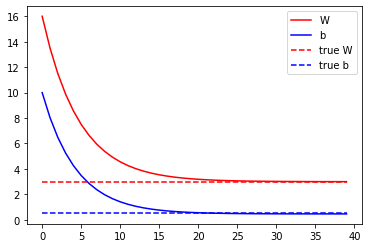

In [11]:
model = LinearModel()
wStore, bStore = [], []
trainingIterations = 40

for epoch in range(trainingIterations):
    wStore.append(model.w.numpy())
    bStore.append(model.b.numpy())
    current_loss = loss(y, model(X))
    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}, W: {model.w.numpy()}, b: {model.b.numpy()}")

plt.plot(range(trainingIterations), wStore, 'r', range(trainingIterations), bStore, 'b')
plt.plot([TRUE_W] * trainingIterations, 'r--', [TRUE_b] * trainingIterations, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

Lets plot the predicted data (based on the estimated model) by evaluating each of the training datapoints:

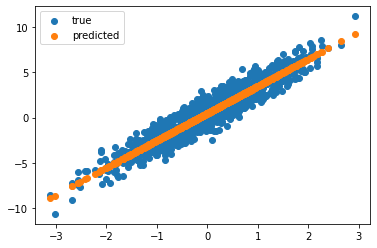

In [12]:
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()

In [13]:
print("True value of W = ", TRUE_W)
print("Estimated value of W = ", model.w)
print("True value of b = ", TRUE_b)
print("Estimated value of b = ", model.b)

True value of W =  3.0
Estimated value of W =  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0002277>
True value of b =  0.5
Estimated value of b =  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.46493825>


***
Mandatory exercises:

- [ ] Carefully read the material above, and ask questions over email.
- [ ] Replicate all of the code in this notebook.